In [15]:
import pandas as pd

In [78]:
file = 'dataset_github/2019/main/labels.csv'
names = ['filename','standard','task2_class','tech_cond','Bathroom','Bathroom cabinet','Bathroom sink','Bathtub','Bed','Bed frame','Bed sheet','Bedroom','Cabinetry','Ceiling','Chair','Chandelier','Chest of drawers','Coffee table','Couch','Countertop','Cupboard','Curtain','Dining room','Door','Drawer','Facade','Fireplace','Floor','Furniture','Grass','Hardwood','House','Kitchen','Kitchen & dining room table','Kitchen stove','Living room','Mattress','Nightstand','Plumbing fixture','Property','Real estate','Refrigerator','Roof','Room','Rural area','Shower','Sink','Sky','Table','Tablecloth','Tap','Tile','Toilet','Tree','Urban area','Wall','Window']
labels_data = pd.read_csv(file, names=names)

In [90]:
print(labels_data.shape)

(2191, 50)


In [79]:
labels_data = labels_data.drop(labels=["filename", "Bathroom", "Bedroom", "Living room", "Kitchen", "Dining room", "House"], axis=1)

In [80]:
labels_data.columns

Index(['standard', 'task2_class', 'tech_cond', 'Bathroom cabinet',
       'Bathroom sink', 'Bathtub', 'Bed', 'Bed frame', 'Bed sheet',
       'Cabinetry', 'Ceiling', 'Chair', 'Chandelier', 'Chest of drawers',
       'Coffee table', 'Couch', 'Countertop', 'Cupboard', 'Curtain', 'Door',
       'Drawer', 'Facade', 'Fireplace', 'Floor', 'Furniture', 'Grass',
       'Hardwood', 'Kitchen & dining room table', 'Kitchen stove', 'Mattress',
       'Nightstand', 'Plumbing fixture', 'Property', 'Real estate',
       'Refrigerator', 'Roof', 'Room', 'Rural area', 'Shower', 'Sink', 'Sky',
       'Table', 'Tablecloth', 'Tap', 'Tile', 'Toilet', 'Tree', 'Urban area',
       'Wall', 'Window'],
      dtype='object')

In [105]:
labels_data.head(5)

,standard,task2_class,tech_cond,Bathroom cabinet,Bathroom sink,Bathtub,Bed,Bed frame,Bed sheet,Cabinetry,...,Sky,Table,Tablecloth,Tap,Tile,Toilet,Tree,Urban area,Wall,Window
552,3,house,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,4,house,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,3,house,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
555,4,house,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
556,4,house,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
labels_data = labels_data.drop(labels_data.index[0])

In [88]:
labels_data = labels_data[labels_data["task2_class"] !="validation"]

In [93]:
from sklearn import model_selection

In [106]:
array = labels_data.values
X = array[:,2:]
Y = array[:,1]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [107]:
seed = 7
scoring = 'f1_weighted'

In [117]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.853692 (0.030119)
LDA: 0.834217 (0.029920)
KNN: 0.815599 (0.029763)
CART: 0.816378 (0.030118)
NB: 0.727946 (0.025931)
SVM: 0.832718 (0.026225)


In [118]:
import matplotlib.pyplot as plt

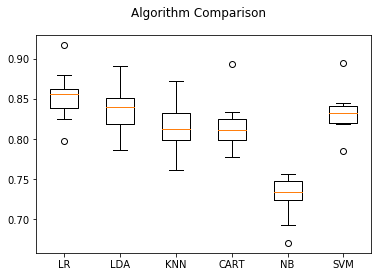

In [119]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [121]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [122]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.815068493150685
[[ 50   1   0   0   3   9]
 [  0  81   2   0   0  18]
 [  1   0  28   1   0  22]
 [  0   0   0  32   0   1]
 [  4   0   2   2  61   6]
 [  1   2   6   0   0 105]]
              precision    recall  f1-score   support

    bathroom       0.89      0.79      0.84        63
     bedroom       0.96      0.80      0.88       101
 dining_room       0.74      0.54      0.62        52
       house       0.91      0.97      0.94        33
     kitchen       0.95      0.81      0.88        75
 living_room       0.65      0.92      0.76       114

    accuracy                           0.82       438
   macro avg       0.85      0.81      0.82       438
weighted avg       0.84      0.82      0.82       438



In [127]:
print(model.predict(array[-2:-1,2:]))
print(array[-2:-1,1])

['bedroom']
['bedroom']
